In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [52]:
square = ((0, 0), (0, 1), (1, 1), (1, 0))
triangle = ((0, 0), (0.5, 1), (1, 0))
hexagon = ((0.5, 0), (1, 0.25), (1, 0.75), (0.5, 1), (0, 0.75), (0, 0.25))

№1

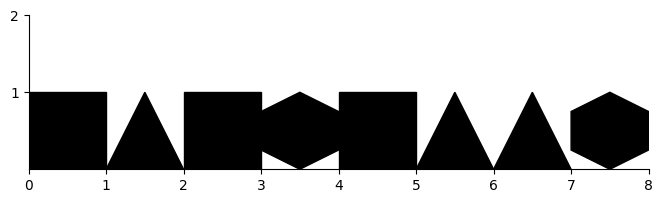

In [75]:

def sequence1(sequence : list):
    _, ax = plt.subplots(figsize = (len(sequence), 2))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([i for i in range(len(sequence) + 1)])
    ax.set_yticks([1, 2])

    for i in range(len(sequence)):
        polygon = [(x[0] + i, x[1]) for x in sequence[i]]
        ax.add_patch(plt.Polygon(polygon, facecolor = 'black', edgecolor = 'black'))

sequence1((square, triangle, square, hexagon, square, triangle, triangle, hexagon))

№2

In [ ]:


def gen_rectangle():
    pass

In [ ]:


def gen_rectangle():
    pass

In [ ]:


def gen_hexagon():
    pass
